### Introduction

We have supplied you with a small dataset of 1 day price data of two stocks i.e. Instrument A and Instrument B. 

The goal of this assignment is to work towards a trading model. Explain your findings, thoughts or hypothesis in a clear fashion.

This assignment comprises several steps: 

1 - Data Preprocessing

2 - Analysis

3 - Trading model


Some steps can be solved/approached differently. Therefore, whenever suited, explain the reasoning behind your approach.

You can use any external library you want, but we expect to be able to just run your notebook top to bottom on Anaconda.

NOTE: If you need to add extra cells in order to solve/explain questions feel free to do so.

Good luck

### 1 - Preprocessing

Analyze the datasets and describe your findings e.g. mean, std etc. Explain any issues that you encounter and how to solve these.

#### Describe the data

Describe that data. What, in your, opinion are important findings?

-First I checked the statistics summary of the data mean,var,std etc.

-Then I printed and plotted them to see if they are equal length, if they have any outliers etc.


In [323]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

def summarizeDf(df,column):
    print('Describe:***')
    summ = df[column].describe()
    summ.loc['var'] = df[column].var() 
    summ.loc['skew'] = df[column].skew()
    print(summ)
    
    
df_a = pd.read_csv('dataset_instrument_A.csv')
df_a.name = 'Stock A'
df_b = pd.read_csv('dataset_instrument_B.csv')
df_a.name = 'Stock B'
print('Stock A:')
print(df_a)
summarizeDf(df_a,'Price')
print('Stock B:')
print(df_b)
summarizeDf(df_b,'Price')

Stock A:
       Hour  Minute  Second  Millisecond          Time  Price
0        16       5      53          176  16:05:53.176  43.00
1         9      22      55          776  09:22:55.776  45.53
2        15      21       3          162  15:21:03.162  43.99
3        12      59      24          711  12:59:24.711  40.58
4        16      24      48          929  16:24:48.929  42.62
...     ...     ...     ...          ...           ...    ...
96460    14      23      15          351  14:23:15.351  41.93
96461    16      37      22          203  16:37:22.203  44.00
96462    13      21      37          714  13:21:37.714  42.39
96463    15      38      58          826  15:38:58.826  43.91
96464    12      10       4          948  12:10:04.948  40.92

[96465 rows x 6 columns]
Describe:***
count    96465.000000
mean        43.209417
std          2.314995
min         38.080000
25%         41.850000
50%         43.100000
75%         45.080000
max         48.990000
var          5.359202
skew      

#### Clean the data

Are there issues with the data? If so, can you solve these issues? 

-Dataset A was not sorted.

-Dataset B contained NaN and outliers like 999 or -999 etc. and also it was shorter than dataset A

-So we need to sort A, clean outlier from B and resample for NaNs and resample it to match the size of A




 Plotting graph of Stock B


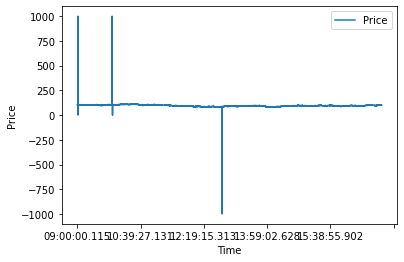

Outliers are found in Dataset: Stock B
       Hour  Minute  Second  Millisecond          Time  Price
156       9       0      46          507  09:00:46.507  999.0
220       9       1       6          405  09:01:06.405    0.0
221       9       1       6          672  09:01:06.672    0.0
223       9       1       6          929  09:01:06.929    0.0
225       9       1       7          416  09:01:07.416    0.0
226       9       1       7          800  09:01:07.800    0.0
227       9       1       7          951  09:01:07.951    0.0
228       9       1       7          993  09:01:07.993    0.0
10903     9      54      21          910  09:54:21.910    NaN
10904     9      54      22          448  09:54:22.448    NaN
10905     9      54      23           48  09:54:23.048    NaN
10906     9      54      23          203  09:54:23.203    NaN
10907     9      54      23          651  09:54:23.651    NaN
10908     9      54      23          756  09:54:23.756    NaN
10909     9      54      24    

/Users/ergodique/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


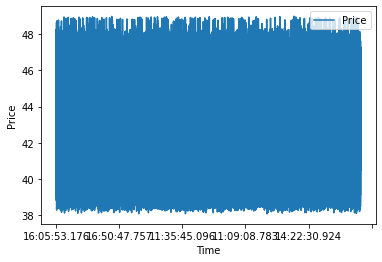

There are no outliers in Dataset: Stock A

 Plotting graph of Stock A


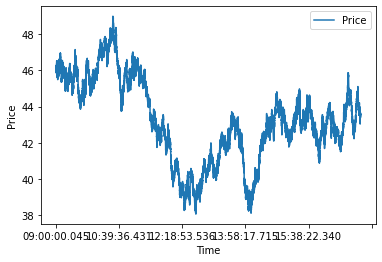

There are no outliers in Dataset: Stock A
Stock A:
Describe:***
count    96465.000000
mean        43.209417
std          2.314995
min         38.080000
25%         41.850000
50%         43.100000
75%         45.080000
max         48.990000
var          5.359202
skew        -0.041192
Name: Price, dtype: float64
Stock B:
Describe:***
count    96164.000000
mean        95.290504
std          7.046527
min         79.340000
25%         90.691000
50%         94.518000
75%        101.210250
max        113.380000
var         49.653546
skew         0.114098
Name: Price, dtype: float64


In [324]:
def drawPlot(df):
    df.plot.line(x='Time', y='Price')
    plt.ylabel("Price")
    plt.show()

def checkDf(df,column,name):
    outlier = []
    print('\n Plotting graph of '+name)
    drawPlot(df)
    #find outliers and NaNs (if there are any)
    trs = 2.5
    mean = df[column].mean()
    std = df[column].std()
    # print(mean, std)
    for i in df[column]:
        z_score = (i-mean)/std
        if (np.abs(z_score) > trs) or math.isnan(i) :
            outlier.append(i)
    if len(outlier):
        print('Outliers are found in Dataset: ' +name)
        print(df.loc[df[column].isin(outlier)])
        #change all outliers to NaN here because we will interpolate these entries later
        print('Outliers turned to NaN in Dataset: '+name)
        for j in df.loc[df[column].isin(outlier)].copy().index:
            df[column].iloc[j] = np.nan  
            
        print('Dataset: '+name +'after changing outliers to NaN') 
        print(df)

    else:
        print('There are no outliers in Dataset: ' +name)



        
        
checkDf(df_b,'Price','Stock B')
checkDf(df_a,'Price','Stock A')

#after running checkDf function on stock A it was clear that it needed a sorting operation
df_a=df_a.sort_values(by='Time',ascending=True)
df_a = df_a.reset_index()
df_a = df_a.drop('index', axis=1)
#check A again
checkDf(df_a,'Price','Stock A')
#summarize again
print('Stock A:')
summarizeDf(df_a,'Price')
print('Stock B:')
summarizeDf(df_b,'Price')


#### Resample

Resample the data. How would you approach this? 

-For resampling of B, I linearly interpolated NaNs and add some normal random perturbations (using its volatility aka std) to make it look like a 'Brownian Bridge'. I didn't find it necessary to model a brownian bridge for that small number of missing samples.

-For resampling to match the size (the resampling I did at the end of dataset B) I used a brownian motion approach. Started with the price at the very end and resampled from that point randomly according to bm. So, in every run those entries will be different. 

/Users/ergodique/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


       Hour  Minute  Second  Millisecond          Time       Price
0       9.0     0.0     0.0        115.0  09:00:00.115  102.981000
1       9.0     0.0     0.0        361.0  09:00:00.361  103.086000
2       9.0     0.0     0.0        391.0  09:00:00.391  103.313000
3       9.0     0.0     0.0        428.0  09:00:00.428  103.237000
4       9.0     0.0     0.0        647.0  09:00:00.647  103.149000
...     ...     ...     ...          ...           ...         ...
96460   NaN     NaN     NaN          NaN           NaN   99.222123
96461   NaN     NaN     NaN          NaN           NaN   99.184397
96462   NaN     NaN     NaN          NaN           NaN   99.174872
96463   NaN     NaN     NaN          NaN           NaN   99.193014
96464   NaN     NaN     NaN          NaN           NaN   99.203578

[96465 rows x 6 columns]


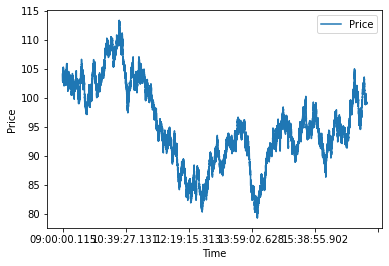

In [325]:
def interpolateDf(df,column):
    #first get NaN indecies stored. We will interpolate them but we all add or subtract some random perturbation
    #to make it look like brownian motion. The perfect way to go might have been modelling a Brownian Bridge maybe
    indecies = []
    df_int = df.copy()
    for j in df.index:
        if math.isnan(df[column].iloc[j]):
            indecies.append(j)
    #print(indecies)        
    df_int[column].interpolate(method = 'linear', inplace = True)
    #interpolation is ok. Now add some random perturbations to the interpolated data, using stock's volatility
    #This way we can make it look like a bit brownian motion
    for i in indecies:
        df_int[column].iloc[i] = df_int[column].iloc[i] + df_bint['Price'].std()*np.random.normal()/np.sqrt(len(df_bint['Price']))
        
    return df_int

def upsampleBrownian(df,column,steps):
    j = 0
    while j<steps:
        #calculate next price to append
        next_price=df[column].iloc[len(df)-1] + df['Price'].std()*np.random.normal()/np.sqrt(len(df['Price']))
        #next_price=df[column].iloc[len(df)-1] + df['Price'].std()*np.random.normal()/np.sqrt(steps)
        df = df.append({'Price': next_price}, ignore_index=True)
        j = j+1
    return df


df_b = interpolateDf(df_b,'Price')

#df_test = df_b.copy()
#df_test = upsampleBrownian(df_test,'Price',20000)
#drawPlot(df_test)
#whichever is short to be upsampled
if len(df_b['Price'])<len(df_a['Price']):
    df_b = upsampleBrownian(df_b,'Price',np.abs(len(df_a['Price'])-len(df_b['Price'])))
else:
    df_a = upsampleBrownian(df_a,'Price',np.abs(len(df_a['Price'])-len(df_b['Price'])))

print(df_b)
drawPlot(df_b)


#### Plots

In some cases visualizing data can be very useful, quickly check for e.g. anomalies, issues, similarities etc. Plot here whatever you think is useful and explain why. 

-After preparing two datasets via cleaning/resampling/sorting etc., I plotted them and saw that they usually move together.

Stock A


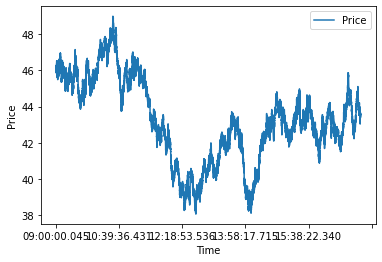

Stock B


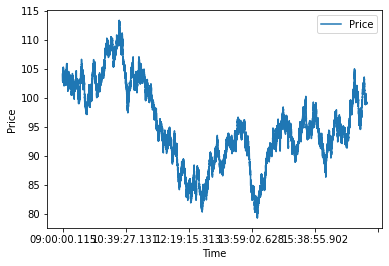

Stock A and B


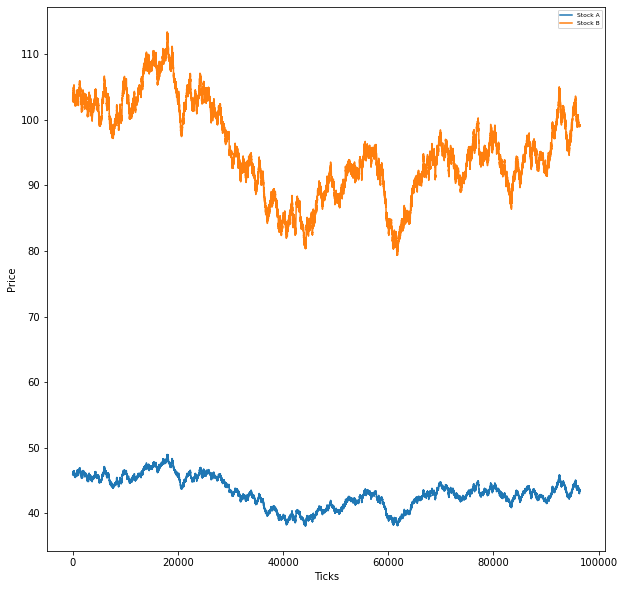

Log Prices Stock A and B


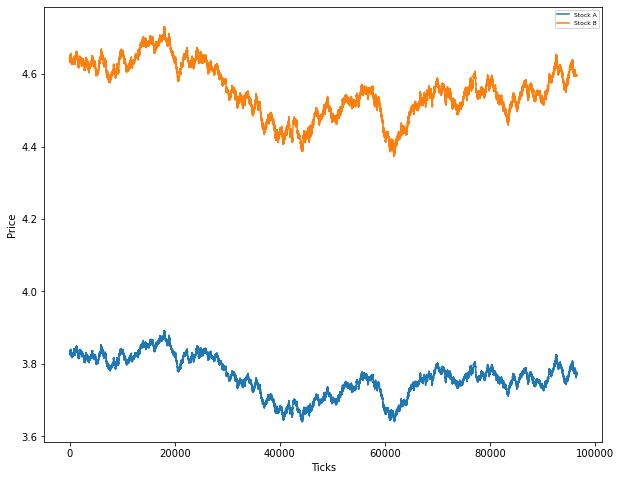

In [326]:
#Until now we already plotted the data to check anomalies, similarities and etc. many times but let's see them
#one more time and also on the same graph this time
print('Stock A')
drawPlot(df_a)
print('Stock B')
drawPlot(df_b)
print('Stock A and B')
df_a.Price.plot(figsize=(10,10),label='Stock A')
df_b.Price.plot(figsize=(10,10),label='Stock B')
plt.legend(loc='upper right',prop={'size':6})
plt.ylabel('Price')
plt.xlabel('Ticks')
plt.show()

print('Log Prices Stock A and B')
np.log(df_a.Price).plot(figsize=(10,8),label='Stock A')
np.log(df_b.Price).plot(figsize=(10,8),label='Stock B')
plt.legend(loc='upper right',prop={'size':6})
plt.ylabel('Price')
plt.xlabel('Ticks')
plt.show()

### 2 - Analyses

#### Correlation

Analyze the correlation between the two instruments. What does this say about the data and its potential uses in trading?

-Even though correlation doesn't mean causality, when it comes to financial instruments if they are correlated then a further cointegration and causality tests can be done on them to come up with some trading strategies.

In [327]:
def checkCorr(df1,df2,column):
    print("Correlations: ")
    print('Pearson R: %f' % df1[column].corr(df2[column]))
    print('Spearman Rho: %f' % df1[column].corr(df2[column],method='spearman'))


checkCorr(df_a,df_b,'Price')
#according to correlation check, they are highly correlated

Correlations: 
Pearson R: 0.986696
Spearman Rho: 0.985598


#### Cointegration

Analyze whether these instrument are cointegrated and report/explain your findings.

-We can use Engle & Grenger cointegration method or Johansen method. E&G is easier to implement since we only have 2 variables.

-Since correlation doesn't mean causality, we should also use Grager causality test to which series lead to which (it can be both ways of causality) The observation was A 'Granger-causes' B. So in the long-term equilibrium equation that will come from OLS, B should be the dependent and A should be the independent variable.

-I checked the series and observed that they are non-stationary on their I(0) levels. So, I applied E&G two step cointegration method to see whether they are cointegrated or not. 

-After seeing that they were cointegrated, according to E&G method we can fit them a simple OLS (with suppressed constants) to get relationship between them. The equation turned out to be: B = 2.207* A + err 

-This means a unit increase in A's price will cause increase in 2.207 units of B's theoretical price.

In [328]:
import statsmodels.tsa.stattools as stsmdl
from statsmodels.tsa.stattools import grangercausalitytests as gcs 
from statsmodels.tsa.stattools import adfuller

def adfTest(series):
    
    adf_results = adfuller(series,maxlag=0)
    print('Augmented Dickey_fuller t-stat: %f' % adf_results[0])
    print('p-value: %f' % adf_results[1])
    print('critical values:')
    for i, j in adf_results[4].items():
        print('\t%s: %.3f' % (i, j))

#since we don't need other parts of the data anymore we can create a new dataframe that only contains prices
#this will ease the calculations and also coding
prices = {'Price A': df_a['Price'], 'Price B': df_b['Price'], 'LogA': np.log(df_a['Price']),'LogB': np.log(df_b['Price'])}
df_price = pd.DataFrame(prices)
print(df_price)

gcs(df_price[['Price A','Price B']], maxlag=[4])
gcs(df_price[['Price B','Price A']], maxlag=[4])
#after running granger causality test, it seems like A 'Granger Causes' B
#we should do our regression accordingly so B will be the dependent variable and A will be the independent (on rhs)


#check stationarity of two price series with Augmented Dickey-Fuller test
print('ADF Test for Stock A Prices')
adfTest(df_price['Price A'])
print('ADF Test for Stock B Prices')
adfTest(df_price['Price B'])

#the Stock prices are non-stationary at their I(0) level we can check cointegration with Engle-Granger method
eg_results = stsmdl.coint(prices['Price A'],prices['Price B'],maxlag=0)
print('\n Engle-Granger coint results: ')
print(eg_results)
#results show that the series are cointegrated


       Price A     Price B      LogA      LogB
0        45.97  102.981000  3.827989  4.634545
1        46.00  103.086000  3.828641  4.635564
2        46.05  103.313000  3.829728  4.637763
3        46.01  103.237000  3.828859  4.637027
4        46.00  103.149000  3.828641  4.636175
...        ...         ...       ...       ...
96460    43.57   99.222123  3.774369  4.597361
96461    43.55   99.184397  3.773910  4.596981
96462    43.59   99.174872  3.774828  4.596885
96463    43.59   99.193014  3.774828  4.597068
96464    43.63   99.203578  3.775745  4.597174

[96465 rows x 4 columns]

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3290  , p=0.8587  , df_denom=96452, df_num=4
ssr based chi2 test:   chi2=1.3160  , p=0.8587  , df=4
likelihood ratio test: chi2=1.3160  , p=0.8587  , df=4
parameter F test:         F=0.3290  , p=0.8587  , df_denom=96452, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1051.1946, p=0.0000  , df_deno

Price A    2.207882
dtype: float64
ADF Test for residuals
Augmented Dickey_fuller t-stat: -3.862175
p-value: 0.002332
critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Residuals


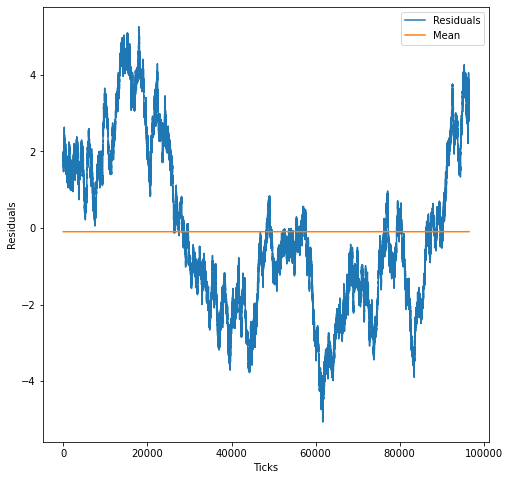

In [329]:
import statsmodels.api as stsm
#since series are cointegrated, our long term equilibrium equation will be an OLS regression
#of A on B like B = c + b*A + err

model = stsm.OLS(df_price['Price B'],df_price['Price A'])
results = model.fit()

print(results.params)

#check if residuals are stationary once more and plot them.
rsd = df_price['Price B'] - results.params[0] * df_price['Price A']
print('ADF Test for residuals')
adfTest(rsd)
#residuals are stationary
mean = np.mean(rsd)+np.zeros(len(rsd))
print('Residuals')
rsd.plot(figsize=(8,8),label='Residuals')
plt.plot(mean,label='Mean')
plt.legend(loc='upper right',prop={'size':10})
plt.ylabel('Residuals')
plt.xlabel('Ticks')
plt.show()

Can you use both instruments to construct a stationary time series? 

-It was done in the previous step at line 11 which means residuals = Stock_B - X * Stock_A
<rsd = df_price['Price B'] - results.params[0] * df_price['Price A']>

Plot and explain your findings here

-This step has also been done previously

### 3 - Trading model

Here you will use the above findings to create a simple (pair) trading model. Use plots and explain your reasoning when needed

#### Theoretical price (fair price)

Are you able to calculate a theoretical price for B based on the price of A (or vice versa), using the cointegration results? Visually compare the theoretical price of B to actual price of B in a plot. Explain the results.

-Using the long term equation, I calculated the theoretical price of B and plotted in on the market price of B. I saw that the spread between these two were sometimes positive and sometimes negative. So there might be a pairs trading system can be designed using these two stocks.

Hedge ratio: 2.207882
Theoretical B and Market B


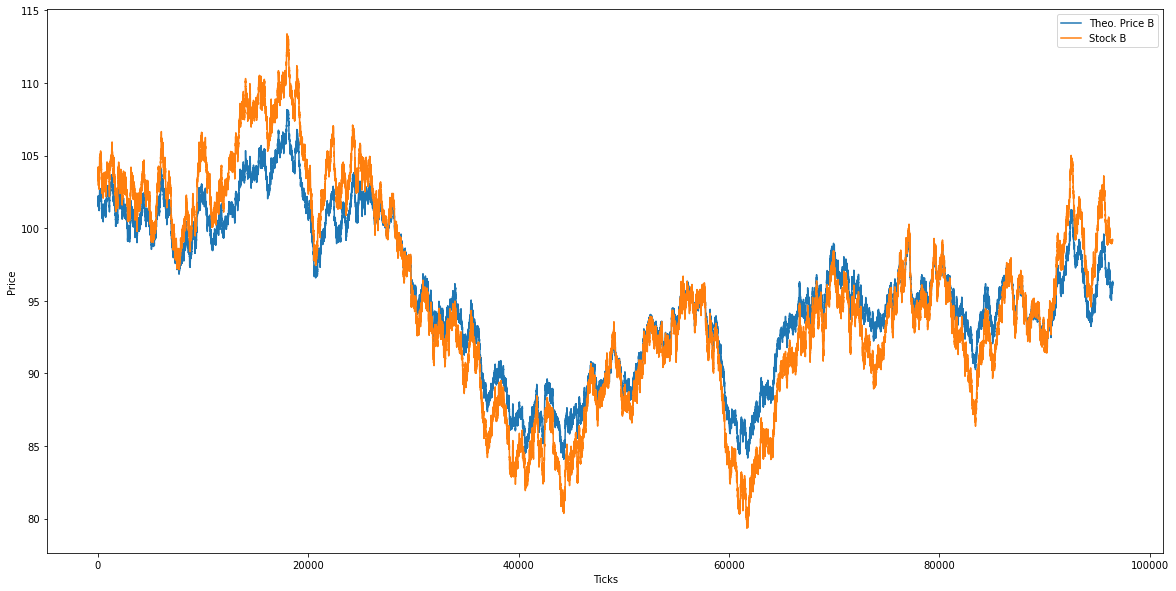

In [330]:
#The coefficient of stock A in our model is called hedge ratio in pairs trading field
coef_a = results.params[0]
print('Hedge ratio: %f' %coef_a)
df_price['T_Price B'] = coef_a * df_price['Price A']
print('Theoretical B and Market B')

df_price['T_Price B'].plot(figsize=(20,10),label='Theo. Price B')
df_price['Price B'].plot(figsize=(20,10),label='Stock B')
plt.legend(loc='upper right',prop={'size':10})
plt.ylabel('Price')
plt.xlabel('Ticks')
plt.show()

#### Pair trading

When comparing the theoretical price of B and the actual price of B, can you come up with a pairs trading model? Visualize and explain potential trading opportunities.

-I saw that the spred was mean reverting (stationary) and I've chosen a simple spread mean reverting strategy. But in order this strategy to be applicable to every stock we need to consider a normalized spread so that trade entry and exits can be parameterized at certain thresholds. 

-After normalizing the spread with the following eqn: spread_n = (spread - mean(spread))/std(spread) , I've also plotted and saw that the normalized spread swings between -2 and +2 mostly.

The Strategy:

-I choose the +2 -2 lines for trade entry and exits. 

-When spread hits -2 A short position should be opened for stock B and a long pos should be opened for A (2.207*A)
So we will sell -1*B and buy 2.21*A to hedge. 

-When spread hits +2 A long position we will buy 1*B and sell 2.21*A to hedge

-If the normalized spread hits zero then all positions will be closed.

-I also thought to put a stop loss at -4 and +4 in case that there has been a structural break in cointegration of these two stocks and further assessment should be done in that case.

-I assume we risk a certain % of the total portfolio per trade, meaning if we stop we will lose 1R and if we take profit we will gain 1R (spread distances 2 to 0 and 2 to 4 means 1:1 r:r ratio) So, returns can be calculated accordingly. 

In [331]:
df_price['BDiff'] = df_price['T_Price B'] - df_price['Price B']

mean = np.mean(df_price['BDiff'])+np.zeros(len(df_price['BDiff']))
zero = np.zeros(len(df_price['BDiff']))
plus2 = 2*np.ones(len(df_price['BDiff']))
minus2 = -2*np.ones(len(df_price['BDiff']))
df_price['BDiff_n'] = np.zeros(len(df_price['BDiff']))

#df_price['BDiff_n'].iloc[1] = (df_price['BDiff'].iloc[1] - mean[1])/df_price['BDiff'].std()

#This spread preparation takes a while, keep that in mind when running.
for i in df_price.index:
    df_price['BDiff_n'].iloc[i] = (df_price['BDiff'].iloc[i] - mean[i])/df_price['BDiff'].std()


#check if this spread is stationary (mean reverting)
print('ADF Test for Spread')
adfTest(df_price['BDiff'])

print('ADF Test for Normalized Spread')
adfTest(df_price['BDiff_n'])

#it appears to be mean reverting so we can devise a pairs trading strategy accordingly.

ADF Test for Spread
Augmented Dickey_fuller t-stat: -3.862175
p-value: 0.002332
critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Test for Normalized Spread
Augmented Dickey_fuller t-stat: -3.862175
p-value: 0.002332
critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


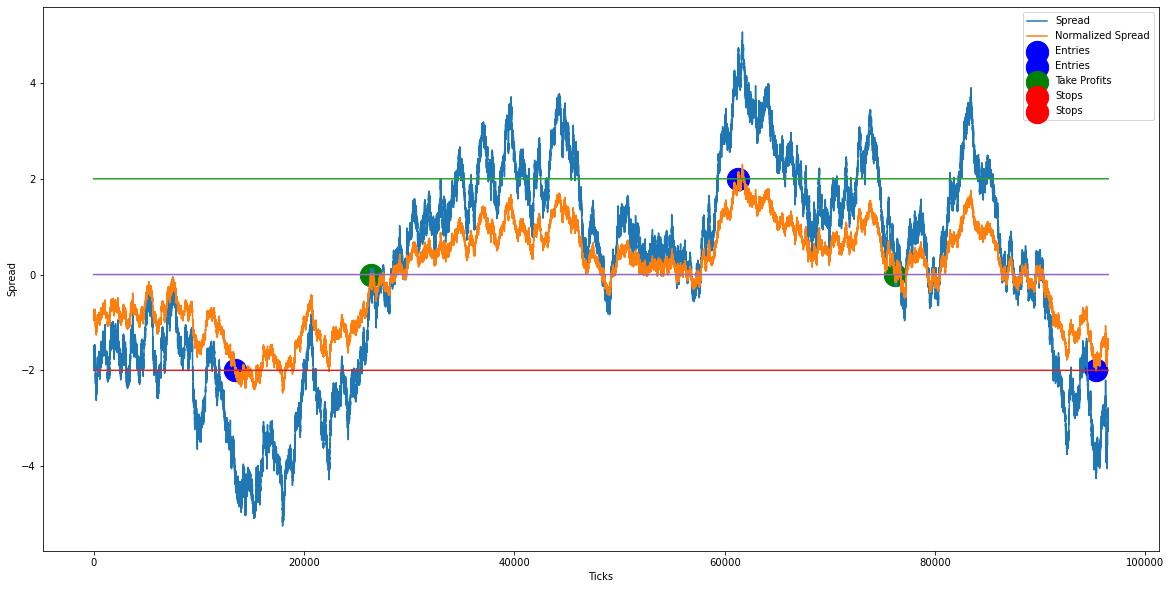

In [332]:
#visualize the strategy

plusEntries = []
minusEntries = []
Profit_Exits = []
plusStop_Exits = []
minusStop_Exits = []
in_position = 0

for i in df_price['BDiff_n'].index:
    
    if df_price['BDiff_n'].iloc[i] >= 2 and in_position == 0:
        plusEntries.append(df_price['BDiff_n'].index[i])
        in_position = 1
    elif df_price['BDiff_n'].iloc[i] <= -2 and in_position == 0:
        minusEntries.append(df_price['BDiff_n'].index[i])
        in_position = 1
    elif (in_position and (df_price['BDiff_n'].iloc[i] <= 0.01 and df_price['BDiff_n'].iloc[i] >= -0.01)):
        Profit_Exits.append(df_price['BDiff_n'].index[i])
        in_position = 0
    elif (in_position and df_price['BDiff_n'].iloc[i] >= 4):
        plusStop_Exits.append(df_price['BDiff_n'].index[i])
        in_position = 0
    elif (in_position and df_price['BDiff_n'].iloc[i] <= -4):
        minusStop_Exits.append(df_price['BDiff_n'].index[i])
        in_position = 0

scatterPlus = 2 * np.ones(len(plusEntries))
scatterMinus = -2 * np.ones(len(minusEntries))
scatterZeros = np.zeros(len(Profit_Exits))
scatterPlusStop = 4 * np.ones(len(plusStop_Exits))
scatterMinusStop = -4 * np.ones(len(minusStop_Exits))

#print(plusEntries)
#print(minusEntries)
#print(Profit_Exits)
#print(plusStop_Exits)
#print(minusStop_Exits)

df_price['BDiff'].plot(figsize=(20,10),label='Spread')
df_price['BDiff_n'].plot(figsize=(20,10),label='Normalized Spread')
plt.plot(plus2)
plt.plot(minus2)
plt.plot(zero)
plt.scatter(plusEntries,scatterPlus,s=500,marker='o',color='b',label='Entries')
plt.scatter(minusEntries,scatterMinus,s=500,marker='o',color='b',label='Entries')
plt.scatter(Profit_Exits,scatterZeros,s=500,marker='o',color='g',label='Take Profits')
plt.scatter(plusStop_Exits,scatterPlusStop,s=500,marker='o',color='r',label='Stops')
plt.scatter(minusStop_Exits,scatterMinusStop,s=500,marker='o',color='r',label='Stops')
plt.legend(loc='upper right',prop={'size':10})
plt.ylabel('Spread')
plt.xlabel('Ticks')
plt.show()

#### Final Thoughts

What are potentially other things you ought to take into consideration when applying trading models to stock trading in the real world? How would you optimize the above model? On what markets do you think the above model would work well and on which markets do you think it would work poorly? 

1)The first thing come to my mind is Liquidity. Since we try to make a pairs trade, we need to cover all sides of the portfolio. Hedging fully is critical in this system, so both stocks must have enough liquidity, according to our position sizes.

2)Execution Quality: We should be able to execute from the market price without too much of a slippage. This is whole another aspect of designing a trading system which is utmost critical for systems profitability.

3)Model validity: Model validity, profitability and real time parameters should be continuously checked (maybe daily) and compared to the parameters that were obtained through backtesting. In this way, if model starts to lose its profitability we would detect it sooner. 

4)Fees: If the trade frequency of the model increases, enter and exit fees will start to eat up from profits.

On Optimization: The entry and exit points have choosen by me arbitrarily. Even though the system looked profitable, the sample size (3 trades in 1 day) is too low to say anything statistically significant. An extensive backtest must be done for at least 1 year of daily data. For instance, using 70% of that years data can be used to optimize the entry and exit thresholds then the rest 30% can be used for a walk-forward (out-sample) test to see if the system benefited from optimization or not. 

Possible Markets:

1) Stocks in the same sector. Even tough the model would be prone to have structural breaks in cointegration, due to different operations and events of different companies.

2) Cryptocurrency market. We know that there is correlation between BTC and most altcoins. BTC vs ETH pair trade strategies can be examined.

3) Oil. It's a known fact that there is cointegration between Brent and WTI. 

4) Commodity vs Miners sector etfs. For example, there is a cointegration between gold and gold miners etfs.

